In [8]:
import torch.nn.functional as F
import torch

def tile_average(image, c):
    # Step 1: Pad the image so H and W are multiples of c
    H, W = image.shape
    pad_h = (c - H % c) % c  # Calculate how much to pad in height
    pad_w = (c - W % c) % c  # Calculate how much to pad in width

    # Pad the image (pad in the order: left, right, top, bottom)
    padded_image = F.pad(image, (0, pad_w, 0, pad_h), mode='constant', value=0)

    # Step 2: Reshape into tiles
    new_H, new_W = padded_image.shape
    tiles = padded_image.unfold(0, c, c).unfold(1, c, c)  # shape: (new_H//c, new_W//c, c, c)

    # Step 3: Calculate the mean in each tile
    tile_means = tiles.mean(dim=(-1, -2))  # shape: (new_H//c, new_W//c)

    return tile_means

# import a  image from torch visiondataset
a = torch.rand(1080, 1920)

c =  50
print(tile_average(a, c).shape)



torch.Size([22, 39])


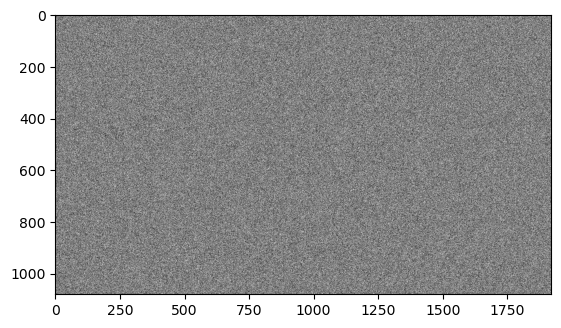

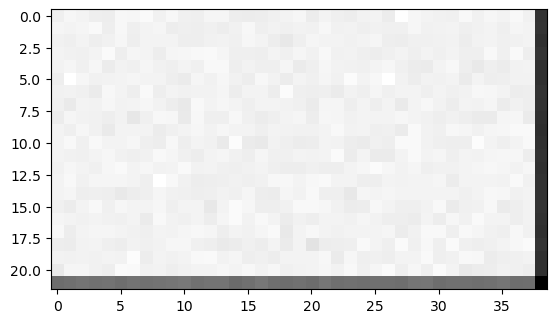

In [9]:
import matplotlib.pyplot as plt

# vis two images
plt.figure()
plt.imshow(a, cmap='gray')
plt.show()

plt.figure()
plt.imshow(tile_average(a, c), cmap='gray')
plt.show()